## Initialization

In [1]:
from scm.plams import Settings, fromASE, plot_molecule
from scm.plams.recipes.bandfragment import BANDFragmentJob

# build the surface
from ase import Atoms
from ase.build import fcc111, add_adsorbate

## Build Surface & Fragments

We first build a gold surface and add the hydrogen adsorbate.

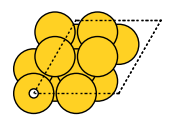

In [2]:
mol = fcc111("Au", size=(2, 2, 3))
add_adsorbate(mol, "H", 1.5, "ontop")
mol.center(vacuum=10.0, axis=2)
plot_molecule(mol);

The system is then split into two fragments based on the species.

In [3]:
surface = mol.copy()
symbols = surface.get_chemical_symbols()
del surface[[i for i in range(len(symbols)) if symbols[i] != "Au"]]
adsorbate = mol.copy()
del adsorbate[[i for i in range(len(symbols)) if symbols[i] == "Au"]]

If available, optimized fragments can also be loaded.

In [4]:
# from ase import io
# surface_opt = io.read("surface_opt.xyz")
# adsorbate_opt = io.read("adsorbate_opt.xyz")
# assert len(surface_opt) == len(surface)
# assert len(adsorbate_opt) == len(adsorbate)

## Set Up & Run Job

For efficiency in this example, we use a minimal basis and reduced computational details to run the job.

In [5]:
base_settings = Settings()
base_settings.input.ams.task = "SinglePoint"
base_settings.input.band.basis.type = "SZ"
base_settings.input.band.basis.core = "Large"
base_settings.input.band.dos.calcdos = "No"
base_settings.input.band.kspace.regular.numberofpoints = "3 3"
base_settings.input.band.beckegrid.quality = "Basic"
base_settings.input.band.zlmfit.quality = "Basic"
base_settings.input.band.usesymmetry = "No"
base_settings.input.band.xc.gga = "PBE"
base_settings.input.band.xc.dispersion = "Grimme4"

eda_settings = Settings()
eda_settings.input.band.peda = ""

eda_job = BANDFragmentJob(
    fragment1=fromASE(surface),
    fragment2=fromASE(adsorbate),
    settings=base_settings,
    full_settings=eda_settings,
    #    fragment1_opt=fromASE(surface_opt),
    #    fragment2_opt=fromASE(adsorbate_opt),
)

In [6]:
eda_job.run()

[25.07|16:11:02] JOB plamsjob STARTED
[25.07|16:11:02] JOB plamsjob RUNNING
[25.07|16:11:02] JOB plamsjob/frag1 STARTED
[25.07|16:11:02] JOB plamsjob/frag1 RUNNING
[25.07|16:11:49] JOB plamsjob/frag1 FINISHED
[25.07|16:11:49] JOB plamsjob/frag1 SUCCESSFUL
[25.07|16:11:49] JOB plamsjob/frag2 STARTED
[25.07|16:11:49] JOB plamsjob/frag2 RUNNING
[25.07|16:11:52] JOB plamsjob/frag2 FINISHED
[25.07|16:11:52] JOB plamsjob/frag2 SUCCESSFUL
[25.07|16:11:52] JOB plamsjob/full STARTED
[25.07|16:11:52] JOB plamsjob/full RUNNING
[25.07|16:12:38] JOB plamsjob/full FINISHED
[25.07|16:12:38] JOB plamsjob/full SUCCESSFUL
[25.07|16:12:38] JOB plamsjob FINISHED
[25.07|16:12:38] JOB plamsjob SUCCESSFUL


## Print Results

In [8]:
results = eda_job.results
eda_res = eda_job.results.get_energy_decomposition()
print("{:<20} {:>10}".format("Term", "Energy [kJ/mol]"))
for key, value in eda_res.items():
    print("{:<20} {:>10.4f}".format(key, value))

Term                 Energy [kJ/mol]
E_int                 -181.9734
E_int_disp              -9.1367
E_Pauli               1122.6899
E_elstat              -519.8489
E_orb                 -775.6514
E_1                  -1861.0731
E_2                     -1.7452
